<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/17%20-%20Pandas%20(les%20Bases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17: Pandas (the Basics) and Titanic Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Load your data into a Pandas DataFrame

https://www.youtube.com/redirect?q=http%3A%2F%2Fbiostat.mc.vanderbilt.edu%2Fwiki%2Fpub%2FMain%2FDataSets%2Ftitanic3.xls&redir_token=IS7fnKxJQSAQBgyL_W_n-Yg2XZJ8MTU4NzkxOTk0MkAxNTg3ODMzNTQy&v=zZkNOdBWgFQ&event=video_description


The most common options:
- read_csv
- read_excel



In [2]:
data = pd.read_excel('../data/titanic.xls')

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.xls'

In [3]:
data.shape
data.head()

NameError: name 'data' is not defined

In [15]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 2. Clean up your dataset with drop(), dropna() and fillna()

In [ ]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [17]:
data = data.dropna(axis=0)
data.shape

(1046, 4)

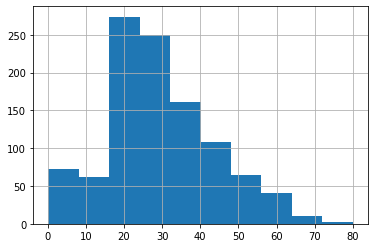

In [18]:
data['age'].hist()

## 3. Groupby() and value_counts()

In [19]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [20]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [21]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [22]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

## 4. Exercice
- Créer des catégories d'ages avec la fonction map() de pandas
- Créer des catégories de genres avec cat.codes

In [ ]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [ ]:
data['age'] = data['age'].map(category_ages)

In [25]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8